<a href="https://colab.research.google.com/github/anisshakil786/Weather_Image_Recognition/blob/ver_1/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import random
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import shutil
from math import ceil

# Define source and target directories
src_dir = '/content/drive/MyDrive/Machine_Learning/dataset'
target_dir1 = '/content/drive/MyDrive/Machine_Learning/dataset1'
target_dir2 = '/content/drive/MyDrive/Machine_Learning/dataset2'

# Create a list of subfolders (weather conditions)
subfolders = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']

# For each subfolder, split the files into 5% and 95%
for subfolder in subfolders:
    # Get the list of files in the subfolder
    files = os.listdir(os.path.join(src_dir, subfolder))

    # Calculate the split index
    split_idx = ceil(len(files) * 0.05)

    # Split the files into two lists
    files1 = files[:split_idx]
    files2 = files[split_idx:]

    # Create the corresponding subfolder in target_dir1 and target_dir2
    os.makedirs(os.path.join(target_dir1, subfolder), exist_ok=True)
    os.makedirs(os.path.join(target_dir2, subfolder), exist_ok=True)

    # Copy the files to the new directories
    for file in files1:
        shutil.copy(os.path.join(src_dir, subfolder, file), os.path.join(target_dir1, subfolder, file))
    for file in files2:
        shutil.copy(os.path.join(src_dir, subfolder, file), os.path.join(target_dir2, subfolder, file))


In [ ]:
# Define the directory containing your dataset
dataset_dir = '/content/drive/MyDrive/Machine_Learning/dataset1'

# Create a list of subfolders (weather conditions)
subfolders = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']

Sample images from the 'dew' subfolder:


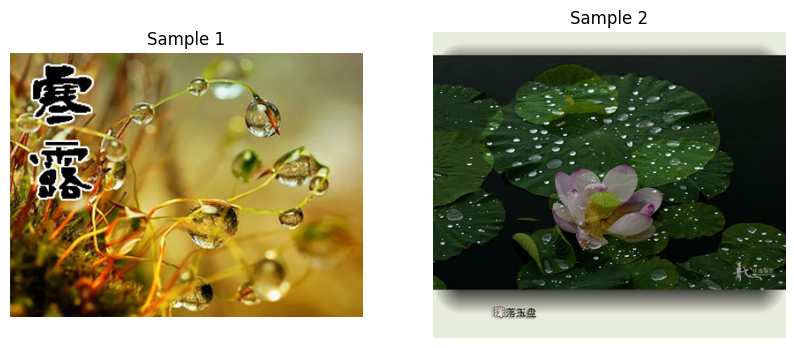

Sample images from the 'fogsmog' subfolder:


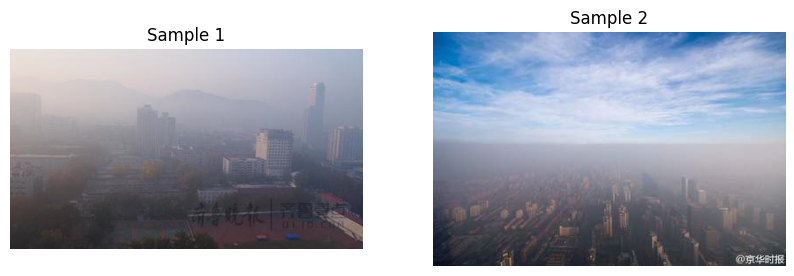

Sample images from the 'frost' subfolder:


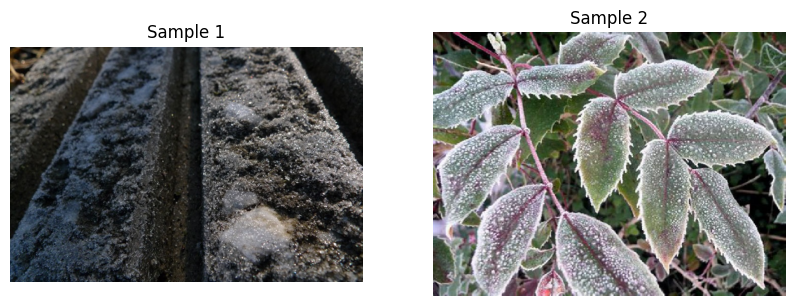

Sample images from the 'glaze' subfolder:


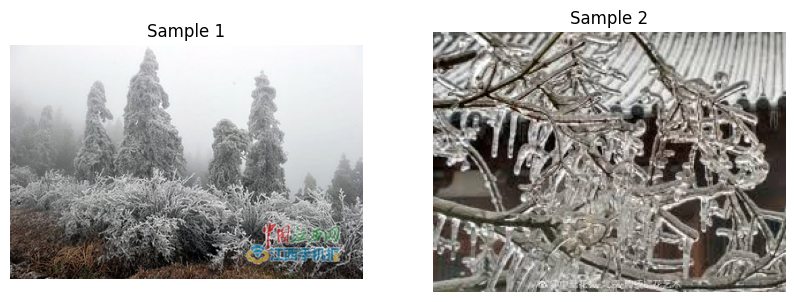

Sample images from the 'hail' subfolder:


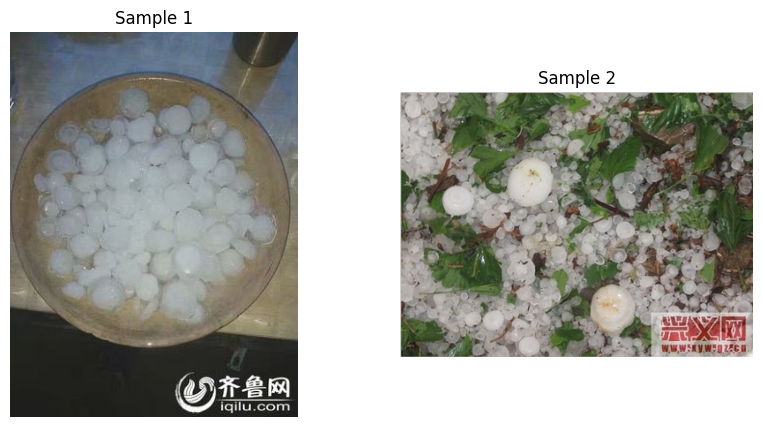

Sample images from the 'lightning' subfolder:


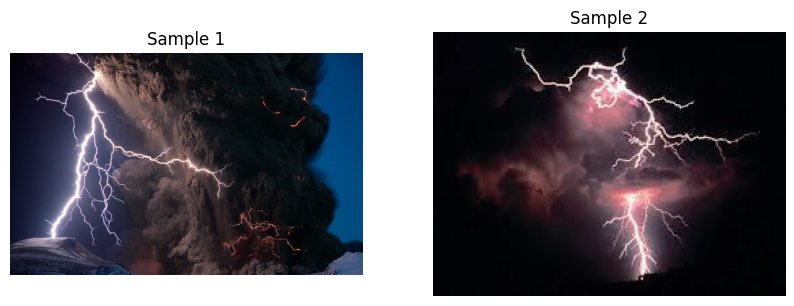

Sample images from the 'rain' subfolder:


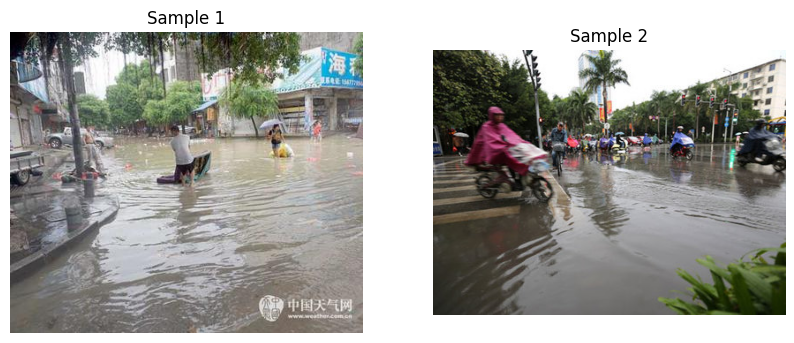

Sample images from the 'rainbow' subfolder:


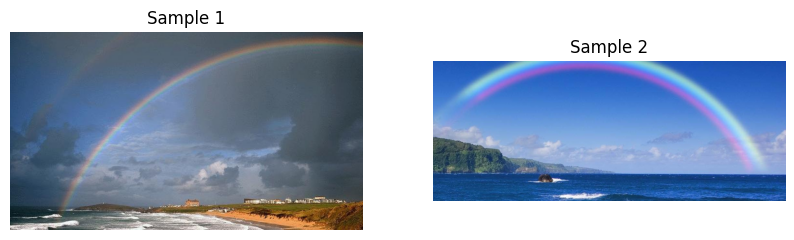

Sample images from the 'rime' subfolder:


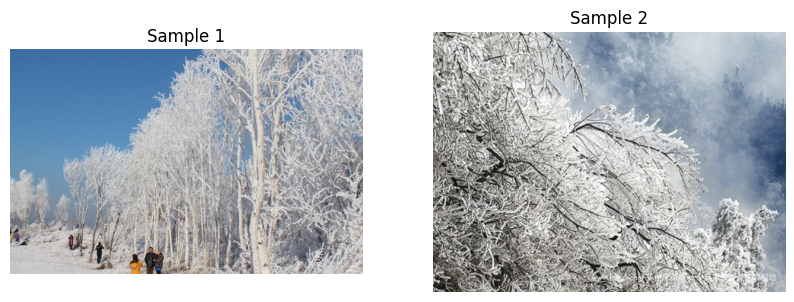

Sample images from the 'sandstorm' subfolder:


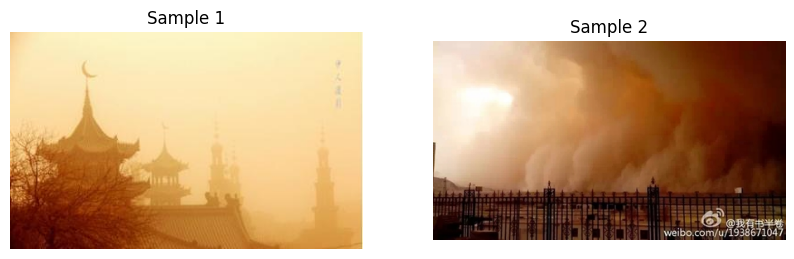

Sample images from the 'snow' subfolder:


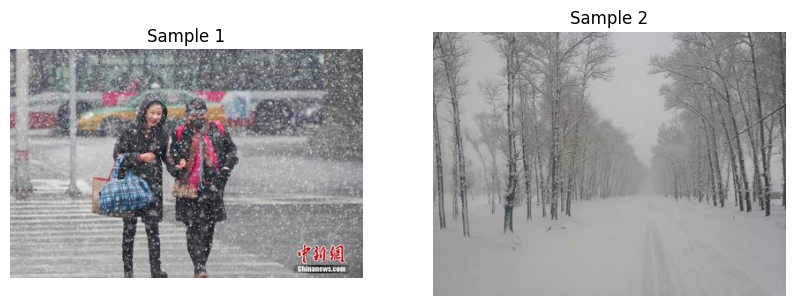

In [ ]:
# Define the number of sample images to display
num_samples = 2

# Display sample images from each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if image_files:
            print(f"Sample images from the '{subfolder}' subfolder:")
            sample_images = random.sample(image_files, num_samples)
            fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
            for i, image_file in enumerate(sample_images):
                img_path = os.path.join(subfolder_path, image_file)
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(f'Sample {i + 1}')
                axes[i].axis('off')
            plt.show()

In [ ]:
# Calculate image statistics for each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        num_images = len(image_files)
        if num_images > 0:
            image_sizes = []
            num_channels = None

            for image_file in image_files:
                img_path = os.path.join(subfolder_path, image_file)
                img = Image.open(img_path)
                width, height = img.size
                image_sizes.append((width, height))

                # Get the number of channels (only for the first image)
                if num_channels is None:
                    num_channels = img.layers if hasattr(img, 'layers') else img.mode

            avg_width = sum(w for w, _ in image_sizes) / len(image_sizes)
            avg_height = sum(h for _, h in image_sizes) / len(image_sizes)
            std_width = (sum((w - avg_width) ** 2 for w, _ in image_sizes) / len(image_sizes)) ** 0.5
            std_height = (sum((h - avg_height) ** 2 for _, h in image_sizes) / len(image_sizes)) ** 0.5

            print(f"Subfolder: {subfolder}")
            print(f"Number of images: {num_images}")
            print(f"Average image size: {avg_width}x{avg_height}")
            print(f"Standard deviation of width: {std_width:.2f}")
            print(f"Standard deviation of height: {std_height:.2f}")
            print(f"Number of channels: {num_channels}")
            print()

Subfolder: dew
Number of images: 35
Average image size: 694.4285714285714x509.4
Standard deviation of width: 301.65
Standard deviation of height: 244.67
Number of channels: 3

Subfolder: fogsmog
Number of images: 43
Average image size: 523.6279069767442x350.83720930232556
Standard deviation of width: 554.07
Standard deviation of height: 420.45
Number of channels: 1

Subfolder: frost
Number of images: 24
Average image size: 969.7083333333334x804.0833333333334
Standard deviation of width: 506.23
Standard deviation of height: 435.06
Number of channels: 3

Subfolder: glaze
Number of images: 32
Average image size: 389.21875x291.46875
Standard deviation of width: 47.46
Standard deviation of height: 60.58
Number of channels: 3

Subfolder: hail
Number of images: 30
Average image size: 432.96666666666664x326.53333333333336
Standard deviation of width: 219.29
Standard deviation of height: 144.89
Number of channels: 3

Subfolder: lightning
Number of images: 19
Average image size: 478.578947368421

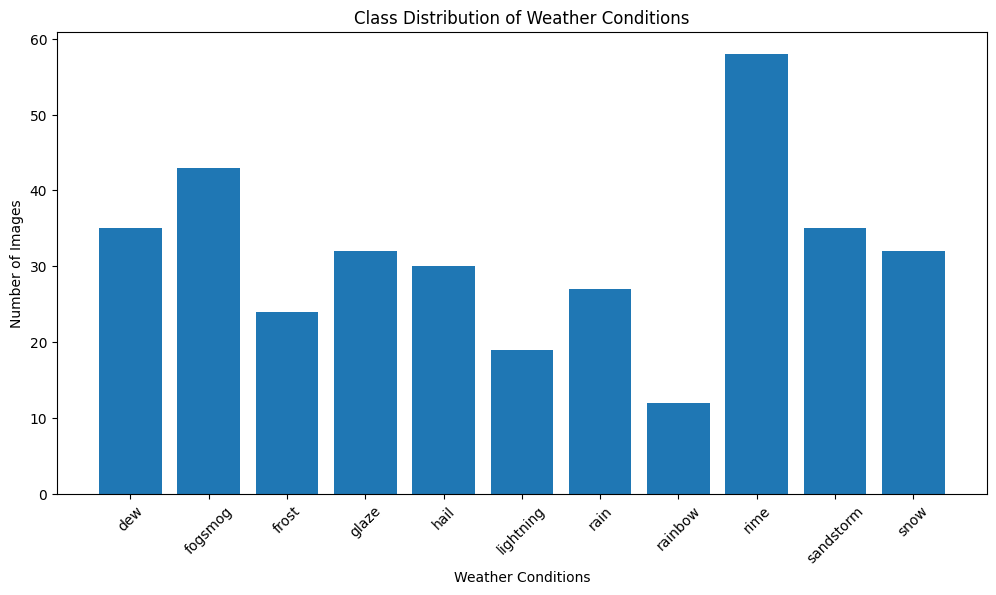

In [ ]:
# Initialize a dictionary to store the class distribution
class_distribution = {subfolder: 0 for subfolder in subfolders}

# Count the number of images in each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        num_images = len(image_files)
        class_distribution[subfolder] = num_images

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Weather Conditions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Initialize a dictionary to store class occurrences
class_occurrences = {subfolder: 0 for subfolder in os.listdir(dataset_dir)}

# Count the number of samples for each class
for subfolder in class_occurrences.keys():
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        num_samples = len(os.listdir(subfolder_path))
        class_occurrences[subfolder] = num_samples

# Create a DataFrame to store class occurrences
df = pd.DataFrame(list(class_occurrences.items()), columns=['Class', 'Occurrences'])

# Print the class occurrences
print(df)

        Class  Occurrences
0         dew           35
1     fogsmog           43
2       frost           24
3       glaze           32
4        hail           30
5   lightning           19
6        rain           27
7     rainbow           12
8        rime           58
9   sandstorm           35
10       snow           32


In [ ]:
# Define the target image size for resizing
target_size = (224, 224)

# Initialize lists to store image data and labels
images = []
labels = []

# Loop through subfolders, each representing a weather condition
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    if os.path.isdir(subdir_path):
        label = subdir
        for filename in os.listdir(subdir_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(subdir_path, filename)
                img = Image.open(img_path)
                img = img.resize(target_size)  # Resize to the target size
                img = img.convert('RGB')  # Ensure it's in RGB mode
                img = np.array(img) / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(label)

# Convert the lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

print("Data preprocessing complete.")

Data preprocessing complete.


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Print the sizes of the sets
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 242 samples
Validation set: 34 samples
Test set: 71 samples


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert integer labels to one-hot encoding for training set
y_train_onehot = to_categorical(y_train_encoded)

# Convert integer labels to one-hot encoding for validation set
y_val_encoded = label_encoder.transform(y_val)
y_val_onehot = to_categorical(y_val_encoded)

# Convert integer labels to one-hot encoding for test set
y_test_encoded = label_encoder.transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

# Print the encoded labels for the first few samples in the training set
print("Encoded labels for the first few training samples:")
print(y_train_encoded[:5])

# Save the label_encoder for later use
np.save('label_encoder.npy', label_encoder.classes_)

print("Label encoding complete.")

Encoded labels for the first few training samples:
[ 2 10  0  8  3]
Label encoding complete.


In [ ]:
# Define the paths to save the preprocessed data
preprocessed_dir = '/content/drive/MyDrive/Machine_Learning/preprocessed_dir'

# Create directories for train, validation, and test data
for split in ['train', 'validation', 'test']:
    os.makedirs(os.path.join(preprocessed_dir, split), exist_ok=True)

In [ ]:
# Iterate over the data split and save images
for data_images, data_labels, data_split in [(X_train, y_train, 'train'),
                                            (X_val, y_val, 'validation'),
                                            (X_test, y_test, 'test')]:
    for i, (img, label) in enumerate(zip(data_images, data_labels)):
        # Convert the NumPy array back to an image
        img = (img * 255).astype(np.uint8)
        img = Image.fromarray(img)

        # Define the filename for the image
        filename = f'{label}_{i}.jpg'

        # Save the image in the appropriate directory
        img.save(os.path.join(preprocessed_dir, data_split, filename))

print("Preprocessing and data splitting complete.")

Preprocessing and data splitting complete.


**After Preproccessing the Data**

In [ ]:
# Define the directory containing your preprocessed data
preprocessed_dir = '/content/drive/MyDrive/Machine_Learning/preprocessed_dir'

# Define the splits
splits = ['train', 'validation', 'test']

Displaying images from train split:


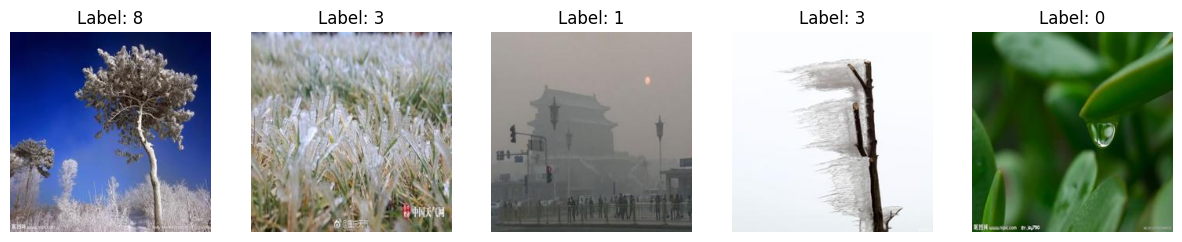

Displaying images from validation split:


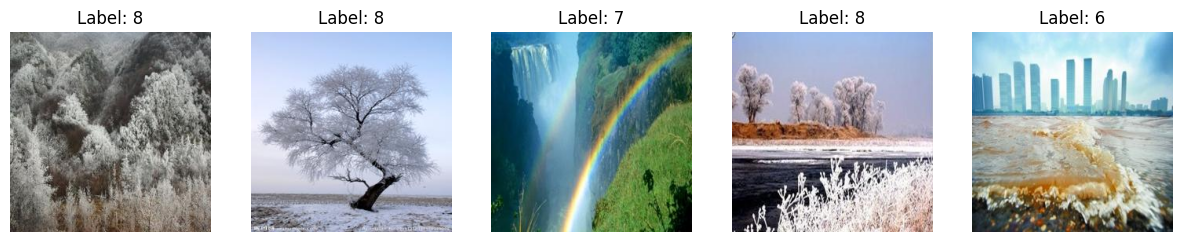

Displaying images from test split:


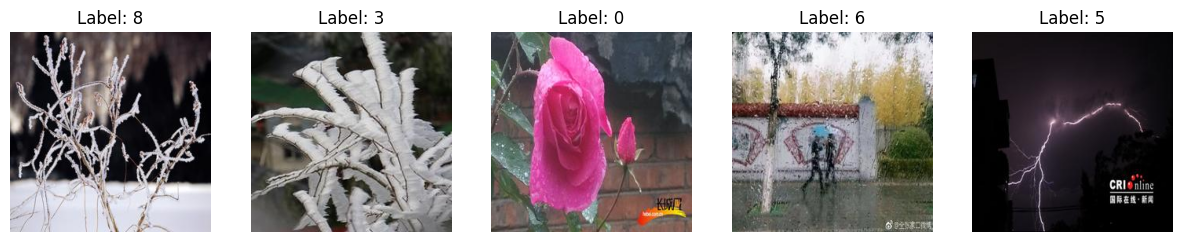

In [ ]:
# Define the number of images to display for each split
num_images_to_display = 5

# Loop through each split and display images
for split in splits:
    split_dir = os.path.join(preprocessed_dir, split)
    print(f"Displaying images from {split} split:")

    # Get a list of image files in the split directory
    image_files = os.listdir(split_dir)

    # Randomly select a subset of images to display
    selected_images = random.sample(image_files, num_images_to_display)

    # Create subplots for displaying multiple images in one row
    fig, axs = plt.subplots(1, num_images_to_display, figsize=(15, 5))

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(split_dir, image_file)
        label = image_file.split('_')[0]  # Extract the label from the image filename

        # Read and display the image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Set up the subplot
        axs[i].imshow(img)
        axs[i].set_title(f"Label: {label}")
        axs[i].axis('off')

    plt.show()

In [ ]:
# Load the pre-trained VGG16 model (without the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(3584, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(11, activation='softmax')(x)  # Replace 'num_classes' with the number of weather conditions

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, you can print a summary of the model architecture
model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# Define the number of epochs and batch size
epochs = 10  # You can adjust this value based on your training requirements
batch_size = 32  # You can adjust this value based on your training requirements

# Learning Rate Scheduler
def lr_schedule(epoch):
    if epoch < 5:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (5 - epoch))

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model Checkpoint to save the best model during training
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Machine_Learning/best_model.h5',
                                   save_best_only=True,
                                   monitor='val_accuracy',
                                   mode='max',
                                   verbose=1)

# Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model
history = model.fit(
    datagen.flow(np.array(X_train), y_train_onehot, batch_size=batch_size),
    validation_data=(np.array(X_val), y_val_onehot),
    epochs=epochs,
    verbose=1,
    callbacks=[lr_scheduler, model_checkpoint]
)

# Save the model
model.save('/content/drive/MyDrive/Machine_Learning/final_model.h5')

# Print the final training accuracy
print("Training Accuracy:", history.history['accuracy'][-1])

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.5199 - accuracy: 0.5289  
Epoch 1: val_accuracy improved from -inf to 0.23529, saving model to /content/drive/MyDrive/Machine_Learning/best_model.h5
8/8 [==============================] - 629s 79s/step - loss: 1.5199 - accuracy: 0.5289 - val_loss: 3.4707 - val_accuracy: 0.2353 - lr: 1.0000e-04
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.3939 - accuracy: 0.5661  
Epoch 2: val_accuracy did not improve from 0.23529
8/8 [==============================] - 589s 74s/step - loss: 1.3939 - accuracy: 0.5661 - val_loss: 4.6290 - val_accuracy: 0.2059 - lr: 1.0000e-04
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.9667 - accuracy: 0.6653  
Epoch 3: val_accuracy improved from 0.23529 to 0.29412, saving model to /content/drive/MyDrive/Machine_Learning/best_model.h5
8/8 [==============================] - 623s 78s/step - loss: 0.9667 - accuracy: 0.6653 - val_loss: 3.2322 - val_accuracy: 0.29

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from PIL import Image

# Load the trained model
model_path = '/content/drive/MyDrive/Machine_Learning/final_model.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/Machine_Learning/preprocessed_dir/validation/0_78.jpg'  # Replace with the path to your image
img = Image.open(image_path)
img = img.resize((224, 224))  # Resize to the input size expected by the model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = loaded_model.predict(img_array)

# Custom decoding function for models with custom classes
def decode_custom_predictions(predictions, top=3, class_labels=None):
    decoded_predictions = []

    # Get the indices of the top-k predictions
    top_indices = np.argsort(predictions[0])[::-1][:top]

    # Decode the top-k predictions
    for i in top_indices:
        label = class_labels[i] if class_labels else f'class_{i}'
        score = predictions[0][i]
        decoded_predictions.append((i, label, score))

    return decoded_predictions

# Use the custom decoding function
class_labels = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
decoded_predictions = decode_custom_predictions(predictions, top=3, class_labels=class_labels)

# Print the custom predictions
print("Predictions:")
for i, (class_index, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 1s 774ms/step
Predictions:
1: glaze (1.00)
2: frost (0.00)
3: dew (0.00)


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Learning Rate Scheduler
def lr_schedule(epoch):
    if epoch < 5:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (5 - epoch))

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model Checkpoint to save the best model during training
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Machine_Learning/best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Function to build the model
def build_model(hp):
    # Load the pre-trained VGG16 model (without the top classification layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add custom classification layers on top of the base model
    x = Flatten()(base_model.output)
    x = Dense(hp.Int('units_1', min_value=256, max_value=4096, step=256), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = Dense(hp.Int('units_2', min_value=256, max_value=4096, step=256), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)
    output = Dense(11, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define the hyperparameter search space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='weather_classification'
)

# Fit the model using the hyperparameter tuner
tuner.search(
    datagen.flow(np.array(X_train), y_train_onehot, batch_size=batch_size),
    validation_data=(np.array(X_val), y_val_onehot),
    epochs=epochs,
    verbose=1,
    callbacks=[lr_scheduler, model_checkpoint, early_stopping]
)

# Print the best hyperparameters
print(tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values)

Trial 5 Complete [00h 42m 18s]
val_accuracy: 0.1764705926179886

Best val_accuracy So Far: 0.47058823704719543
Total elapsed time: 04h 39m 34s
{'units_1': 3584, 'dropout_1': 0.2, 'units_2': 512, 'dropout_2': 0.2, 'learning_rate': 0.001}
